In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import cufflinks as cf
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Working with train data

## Importing data

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/ml_project_data/train_data.csv"
train = pd.read_csv(train_path)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,450407,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,-17210,-774,-5580.0,-755,NaN,1,1,1,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.264354,NaN,0.0124,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0095,NaN,0.000,0.0126,NaN,0.9444,NaN,NaN,0.0000,0.0345,0.0417,NaN,NaN,NaN,0.0099,NaN,0.000,0.0125,NaN,0.9444,NaN,NaN,0.00,0.0345,0.0417,NaN,NaN,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0074,Mixed,No,0.0,0.0,0.0,0.0,-150.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,271298,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018850,-18640,-96,-5711.0,-2175,25.0,1,1,0,1,0,1,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.581064,0.172251,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-444.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,122238,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.022625,-14649,-6130,-1776.0,-4568,9.0,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 4,NaN,0.636218,0.540654,0.1979,0.1169,0.9841,0.7824,0.1119,0.16,0.0690,0.4583,0.5,0.1587,0.1614,0.1033,0.0,0.188,0.2017,0.1213,0.9841,0.7909,0.113,0.1611,0.0690,0.4583,0.5,0.1623,0.1763,0.1076,0.0,0.199,0.1999,0.1169,0.9841,0.7853,0.1127,0.16,0.0690,0.4583,0.5,0.1615,0.1642,0.1051,0.0,0.1919,reg oper account,block of flats,0.1789,Panel,No,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,

In [ ]:
train.shape

(184506, 122)

In [ ]:
train.isna().sum()

SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          6
AMT_GOODS_PRICE                    167
NAME_TYPE_SUITE                    770
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     121633
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [ ]:
train.drop(axis="columns", labels="SK_ID_CURR", inplace=True)

## Handling NULL Values

In [ ]:
isna = train.isna().sum()
data_type = train.dtypes

index = []
dropped_columns = []


for i in isna.index:
  index.append(i)

value = isna.tolist()

data = train.dtypes.tolist()

for_row = train.shape[0] * 5 / 100
for_columns = train.shape[0] * 0.5

for i in range(len(index)):
  if value[i] < for_row:               # if less than 9000 values of the column is NAN then just drop the row
    train.drop(axis="rows", labels=train.index[train[index[i]].isna()], inplace = True)
  
  elif value[i] > for_columns:            # if more than 90000 values of the column is NAN then drop the column
    train.drop(axis="columns", labels=index[i], inplace=True)
    dropped_columns.append(index[i])

  else:
    if data[i] == "object":
      mode = train[index[i]].mode()  # in between, if the column is non number type, insert mode of the column in the nan values
      train[index[i]].fillna(mode[0], inplace=True)
    else:
      mean = train[index[i]].mean()             # if column is number type, insert mean of the numbers
      train[index[i]].fillna(mean, inplace=True)

In [ ]:
train.dropna(axis=0, inplace=True)

In [ ]:
train.shape

(182683, 80)

Handling Categorical Data

In [ ]:
train.nunique(axis=0)

NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       14
AMT_INCOME_TOTAL                 1746
AMT_CREDIT                       4844
AMT_ANNUITY                     12401
AMT_GOODS_PRICE                   782
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17327
DAYS_EMPLOYED                   11384
DAYS_REGISTRATION               14989
DAYS_ID_PUBLISH                  6085
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_TYPE                    18
CNT_FAM_MEMB

In [ ]:
delete_one_value = []
for i in train.columns:
  if(train.nunique(axis=0)[i] == 1):
    delete_one_value.append(i)
delete_one_value

['FLAG_MOBIL', 'FLAG_DOCUMENT_12']

In [ ]:
train.drop(train[delete_one_value], axis="columns", inplace=True)

In [ ]:
train['CODE_GENDER'].replace('XNA', 'M', inplace=True)

In [ ]:
train["CODE_GENDER"].value_counts()

F    120147
M     62536
Name: CODE_GENDER, dtype: int64

In [ ]:
index = train.isna().sum().index.tolist()
data = train.dtypes.tolist()
num_of_values = train.nunique(axis=0)

one_hot_encode = []
label_encode = []

for i in range(len(index)):
  if data[i] == "object":       # all columns with non number data type has to be encoded
    if(num_of_values[index[i]] < 10):
      one_hot_encode.append(index[i])
    else:
      label_encode.append(index[i])

print(one_hot_encode)
print(label_encode)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'EMERGENCYSTATE_MODE']
['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']


In [ ]:
train = pd.get_dummies(train, columns = one_hot_encode)

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
train['OCCUPATION_TYPE'] = label_encoder.fit_transform(train['OCCUPATION_TYPE'])

In [ ]:
train['ORGANIZATION_TYPE'] = label_encoder.fit_transform(train['ORGANIZATION_TYPE'])

## Deleting Columns with High Corelation

In [ ]:
cor = train.corr().abs()

tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
drop = [i for i in tri.columns if any(tri[i] > 0.90)]   # if two columns have more than 90 percent corelation one of them has to be dropped

train.drop(train[drop], axis="columns", inplace=True)

In [ ]:
train.shape

(182683, 101)

## Train Validation Split

In [ ]:
X = train.drop(axis="columns", labels="TARGET")

In [ ]:
y = train["TARGET"]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 65)

In [ ]:
X_train.shape

(137012, 100)

In [ ]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

## Model Training

### XG Boost

In [ ]:
xgb = XGBClassifier(n_estimators= 1000,learning_rate= 0.1,scale_pos_weight=5)

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=1000, scale_pos_weight=5)

In [ ]:
y_train_pred = xgb.predict(X_train)

In [ ]:
accuracy_score(y_train_pred, y_train)

0.8783975126266312

In [ ]:
f1_score(y_train_pred, y_train)

0.36667046793629066

In [ ]:
y_val_pred = xgb.predict(X_val)

In [ ]:
accuracy_score(y_val_pred, y_val)

0.8649252260734382

In [ ]:
f1_score(y_val_pred, y_val)

0.2937607326846021

# Working with test data

## Importing data

In [ ]:
test_path = "/content/drive/MyDrive/ml_project_data/test_data.csv"
test = pd.read_csv(test_path)

In [ ]:
test.shape

(123005, 121)

In [ ]:
test.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   111
NAME_TYPE_SUITE                   522
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     81296
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

## Handling NULL Values

In [ ]:
for i in range(len(dropped_columns)):
    test.drop(axis="columns", labels=dropped_columns[i], inplace=True)

In [ ]:
isna = test.isna().sum()
data_type = test.dtypes

index = []

for i in isna.index:
  index.append(i)

value = isna.tolist()

data = test.dtypes.tolist()

for i in range(len(index)):
  if data[i] == "object":
    mode = test[index[i]].mode(dropna=True)  # in between, if the column is non number type, insert mode of the column in the nan values
    test[index[i]].fillna(mode[0], inplace=True)
  else:
    mean = test[index[i]].mean()             # if column is number type, insert mean of the numbers
    test[index[i]].fillna(mean, inplace=True)

In [ ]:
test.shape

(123005, 80)

In [ ]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,Cash loans,F,N,Y,0,180000.0,265306.5,25317.0,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.032561,-21413,-5323,-3666.0,-4551,1,1,0,1,1,0,Laborers,2.0,1,1,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.708546,0.510791,0.990100,0.520800,0.983100,0.33330,0.990100,0.541700,0.236200,No,1.0,0.0,1.0,0.0,-1547.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000
1,439847,Cash loans,F,N,Y,0,202500.0,346500.0,21069.0,346500.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-20087,-1406,-7258.0,-3639,1,1,0,1,0,0,Sales staff,1.0,2,2,THURSDAY,13,0,0,0,0,0,0,Trade: type 7,0.649626,0.513694,0.987100,0.166700,0.987100,0.16670,0.987100,0.166700,0.137500,No,0.0,0.0,0.0,0.0,-415.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
2,380562,Cash loans,M,Y,N,0,360000.0,545040.0,36553.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13008,-1874,-4975.0,-5324,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,4,0,0,0,0,0,0,Business Entity Type 3,0.645383,0.740799,0.975700,0.166700,0.975700,0.16670,0.975700,0.166700,0.071200,No,0.0,0.0,0.0,0.0,-2459.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
3,407238,Cash loans,F,N,Y,0,135000.0,307557.0,20682.0,265500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.008625,-10699,-1454,-1020.0,-2220,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,10,0,0,0,0,1,1,Self-employed,0.409479,0.456110,0.977645,0.226754,0.977039,0.22294,0.977634,0.226428,0.103046,No,3.0,0.0,3.0,0.0,-564.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
4,239910,Cash loans,F,N,Y,0,157500.0,1056447.0,31018.5,922500.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.010643,-18283,365243,-10425.0,-1829,1,0,0,1,1,0,Laborers,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.265227,0.510791,0.977645,0.226754,0.977039,0.22294,0.977634,0.226428,0.103046,No,3.0,0.0,3.0,0.0,-657.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006499,0.006499,0.034306,0.267618,0.263533,1.903676


## Handling Categorical Data

In [ ]:
test.loc[test['NAME_FAMILY_STATUS'] == 'Unknown', 'NAME_FAMILY_STATUS'] = 'Single / not married'

In [ ]:
test['CODE_GENDER'].replace('XNA', 'M', inplace=True)

In [ ]:
test["CODE_GENDER"].value_counts()

F    81091
M    41914
Name: CODE_GENDER, dtype: int64

In [ ]:
train.shape

(182683, 101)

In [ ]:
test = pd.get_dummies(test, columns=one_hot_encode)

In [ ]:
test['OCCUPATION_TYPE'] = label_encoder.fit_transform(test['OCCUPATION_TYPE'])

In [ ]:
test['ORGANIZATION_TYPE'] = label_encoder.fit_transform(test['ORGANIZATION_TYPE'])

In [ ]:
test.shape

(123005, 117)

In [ ]:
test.drop(test[delete_one_value], axis="columns", inplace=True)

## Deleting columns with high corelation

In [ ]:
test.drop(test[drop], axis="columns", inplace=True)

In [ ]:
test.shape

(123005, 101)

## Model Implementation

In [ ]:
test["SK_ID_CURR"].head()

0    367294
1    439847
2    380562
3    407238
4    239910
Name: SK_ID_CURR, dtype: int64

In [ ]:
id = test["SK_ID_CURR"].to_numpy()
test.drop(axis="columns", labels="SK_ID_CURR", inplace=True)

In [ ]:
test.shape

(123005, 100)

In [ ]:
test.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'F

In [ ]:
test_np = test.to_numpy()

### XG Boost

In [ ]:
y_test_pred = xgb.predict(test_np)

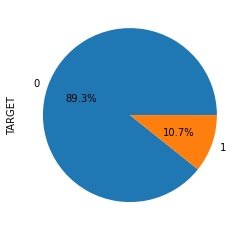

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["TARGET"])
y_test_pred_df.TARGET.value_counts().plot(kind='pie',autopct='%1.1f%%')

# Writing to file

In [ ]:
final = np.array(list(zip(id, y_test_pred)))

In [ ]:
out_set = pd.DataFrame(final, columns = ['SK_ID_CURR','TARGET'])

In [ ]:
out_set.to_csv('out.csv', index=False)